# Assignment 2

**Data sets to use: WestRoxbury_housing.csv**

* Possible points: 100

* Rename the .ipynb notebook as Assignment_2_{FirstName}_{LastName}.ipynb before submitting your notebook. Eg. Assignment_2_Vijay_Koju.ipynb

* Due Date: 04/07/2023 11:59pm

* Submit the .ipynb notebook only. There is no need to submit the data file and any other write up. All your code, and answers should be included in the notebook.

##### Include the following information:

* Name: Vinh Huynh
* UTD ID: 2021635587
* Email: vxh210013@

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### 1) Import the data.

In [5]:
datahouse=pd.read_csv("C:/Users/tuanv/Downloads/WestRoxbury_housing.csv")
datahouse.info()
display(datahouse)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5802 entries, 0 to 5801
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   TOTAL VALUE  5802 non-null   float64
 1   LOT SQFT     5684 non-null   float64
 2   YR BUILT     5739 non-null   float64
 3   GROSS AREA   5802 non-null   int64  
 4   LIVING AREA  5802 non-null   int64  
 5   FLOORS       5802 non-null   float64
 6   ROOMS        5802 non-null   int64  
 7   BEDROOMS     5802 non-null   int64  
 8   FULL BATH    5802 non-null   int64  
 9   HALF BATH    5802 non-null   int64  
 10  KITCHEN      5802 non-null   int64  
 11  FIREPLACE    5802 non-null   int64  
 12  REMODEL      5768 non-null   object 
dtypes: float64(4), int64(8), object(1)
memory usage: 589.4+ KB


,TOTAL VALUE,LOT SQFT,YR BUILT,GROSS AREA,LIVING AREA,FLOORS,ROOMS,BEDROOMS,FULL BATH,HALF BATH,KITCHEN,FIREPLACE,REMODEL
0,344.2,9965.0,1880.0,2436,1352,2.0,6,3,1,1,1,0,None
1,412.6,6590.0,1945.0,3108,1976,2.0,10,4,2,1,1,0,Recent
2,330.1,7500.0,1890.0,2294,1371,2.0,8,4,1,1,1,0,None
3,498.6,13773.0,1957.0,5032,2608,1.0,9,5,1,1,1,1,None
4,331.5,5000.0,1910.0,2370,1438,2.0,7,3,2,0,1,0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5797,404.8,6762.0,1938.0,2594,1714,2.0,9,3,2,1,1,1,Recent
5798,407.9,9408.0,1950.0,2414,1333,2.0,6,3,1,1,1,1,None
5799,406.5,7198.0,1987.0,2480,1674,2.0,7,3,1,1,1,1,None
5800,308.7,6890.0,1946.0,2000,1000,1.0,5,2,1,0,1,0,None


### 2) Check if there are any missing values in any of the columns.

In [6]:
datahouse.isnull().any()

TOTAL VALUE    False
LOT SQFT        True
YR BUILT        True
GROSS AREA     False
LIVING AREA    False
FLOORS         False
ROOMS          False
BEDROOMS       False
FULL BATH      False
HALF BATH      False
KITCHEN        False
FIREPLACE      False
REMODEL         True
dtype: bool

### 3) Replace the missing values with median for numeric columns and mode for categorical column.

In [7]:
for column in datahouse.columns:
    if datahouse[column].dtype == 'object':
        # fill missing values with mode for categorical columns
        datahouse[column].fillna(datahouse[column].mode()[0], inplace=True)
    else:
        # fill missing values with median for numeric columns
        datahouse[column].fillna(datahouse[column].median(), inplace=True);
datahouse.isnull().any()

TOTAL VALUE    False
LOT SQFT       False
YR BUILT       False
GROSS AREA     False
LIVING AREA    False
FLOORS         False
ROOMS          False
BEDROOMS       False
FULL BATH      False
HALF BATH      False
KITCHEN        False
FIREPLACE      False
REMODEL        False
dtype: bool

### 4) Remove the duplicate rows (if any) from the datafame.

In [8]:
datahouse.drop_duplicates(inplace=True)
datahouse.info()
datahouse

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5799 entries, 0 to 5801
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   TOTAL VALUE  5799 non-null   float64
 1   LOT SQFT     5799 non-null   float64
 2   YR BUILT     5799 non-null   float64
 3   GROSS AREA   5799 non-null   int64  
 4   LIVING AREA  5799 non-null   int64  
 5   FLOORS       5799 non-null   float64
 6   ROOMS        5799 non-null   int64  
 7   BEDROOMS     5799 non-null   int64  
 8   FULL BATH    5799 non-null   int64  
 9   HALF BATH    5799 non-null   int64  
 10  KITCHEN      5799 non-null   int64  
 11  FIREPLACE    5799 non-null   int64  
 12  REMODEL      5799 non-null   object 
dtypes: float64(4), int64(8), object(1)
memory usage: 634.3+ KB


,TOTAL VALUE,LOT SQFT,YR BUILT,GROSS AREA,LIVING AREA,FLOORS,ROOMS,BEDROOMS,FULL BATH,HALF BATH,KITCHEN,FIREPLACE,REMODEL
0,344.2,9965.0,1880.0,2436,1352,2.0,6,3,1,1,1,0,None
1,412.6,6590.0,1945.0,3108,1976,2.0,10,4,2,1,1,0,Recent
2,330.1,7500.0,1890.0,2294,1371,2.0,8,4,1,1,1,0,None
3,498.6,13773.0,1957.0,5032,2608,1.0,9,5,1,1,1,1,None
4,331.5,5000.0,1910.0,2370,1438,2.0,7,3,2,0,1,0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5797,404.8,6762.0,1938.0,2594,1714,2.0,9,3,2,1,1,1,Recent
5798,407.9,9408.0,1950.0,2414,1333,2.0,6,3,1,1,1,1,None
5799,406.5,7198.0,1987.0,2480,1674,2.0,7,3,1,1,1,1,None
5800,308.7,6890.0,1946.0,2000,1000,1.0,5,2,1,0,1,0,None


### 5) Check the 'YR BUILT' column and see if there is any abnormal value(s). If yes, treat them appropriately.

In [10]:
datahouse[datahouse['YR BUILT'] ==0]

,TOTAL VALUE,LOT SQFT,YR BUILT,GROSS AREA,LIVING AREA,FLOORS,ROOMS,BEDROOMS,FULL BATH,HALF BATH,KITCHEN,FIREPLACE,REMODEL
1492,569.2,7000.0,0.0,4732,2641,2.0,8,4,2,1,1,1,Recent


In [17]:
datahouse = datahouse.drop(datahouse[datahouse['YR BUILT']==0].index[0], axis =0)

In [19]:
datahouse = datahouse.reset_index().drop('index', axis=1)
datahouse[datahouse['YR BUILT'] ==0]

,TOTAL VALUE,LOT SQFT,YR BUILT,GROSS AREA,LIVING AREA,FLOORS,ROOMS,BEDROOMS,FULL BATH,HALF BATH,KITCHEN,FIREPLACE,REMODEL


### 6) Perform exploratory data analysis (EDA): Univariate & Bivariate

In [24]:
numeric_columns = datahouse.select_dtypes(include=np.number).columns.tolist()
string_columns = datahouse.select_dtypes(include='object').columns.tolist()
string_columns, numeric_columns

(['REMODEL'],
 ['TOTAL VALUE',
  'LOT SQFT',
  'YR BUILT',
  'GROSS AREA',
  'LIVING AREA',
  'FLOORS',
  'ROOMS',
  'BEDROOMS',
  'FULL BATH',
  'HALF BATH',
  'KITCHEN',
  'FIREPLACE'])

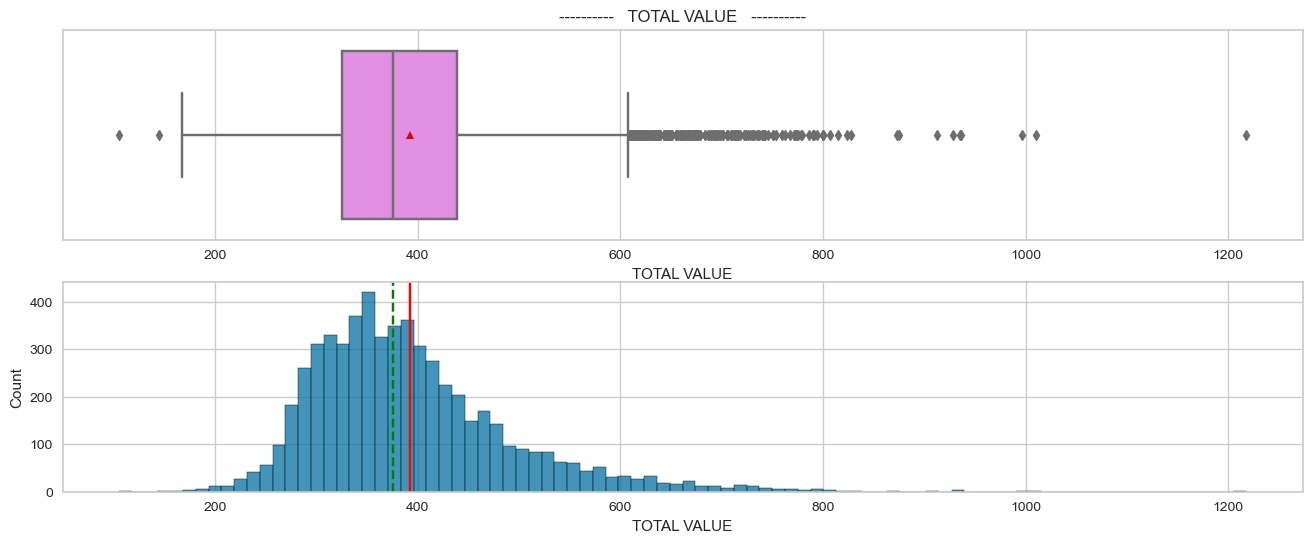

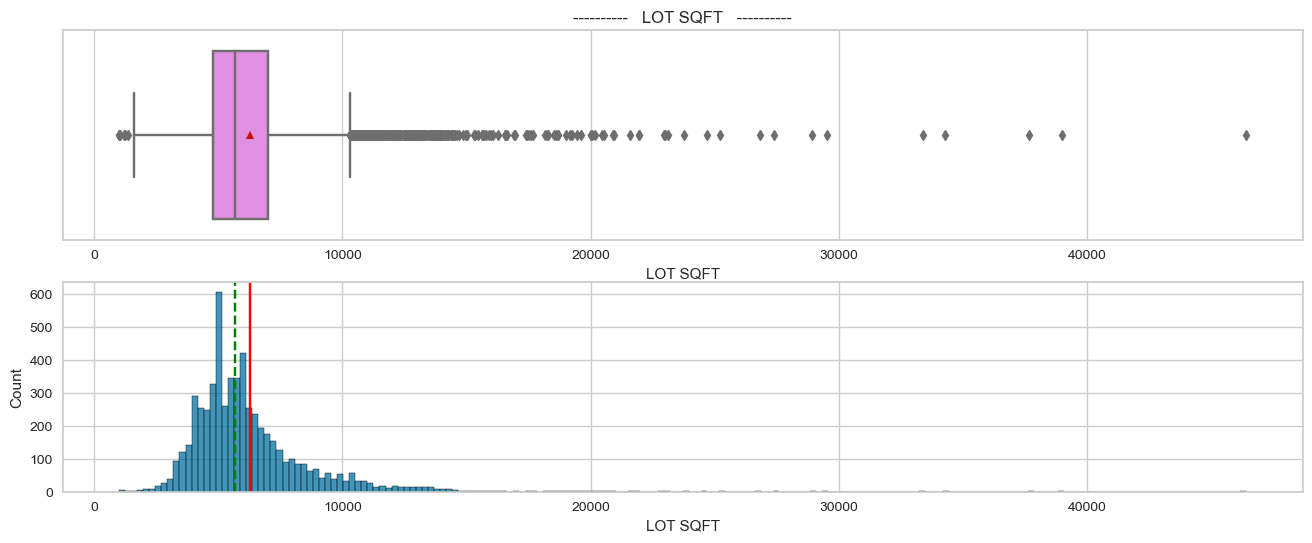

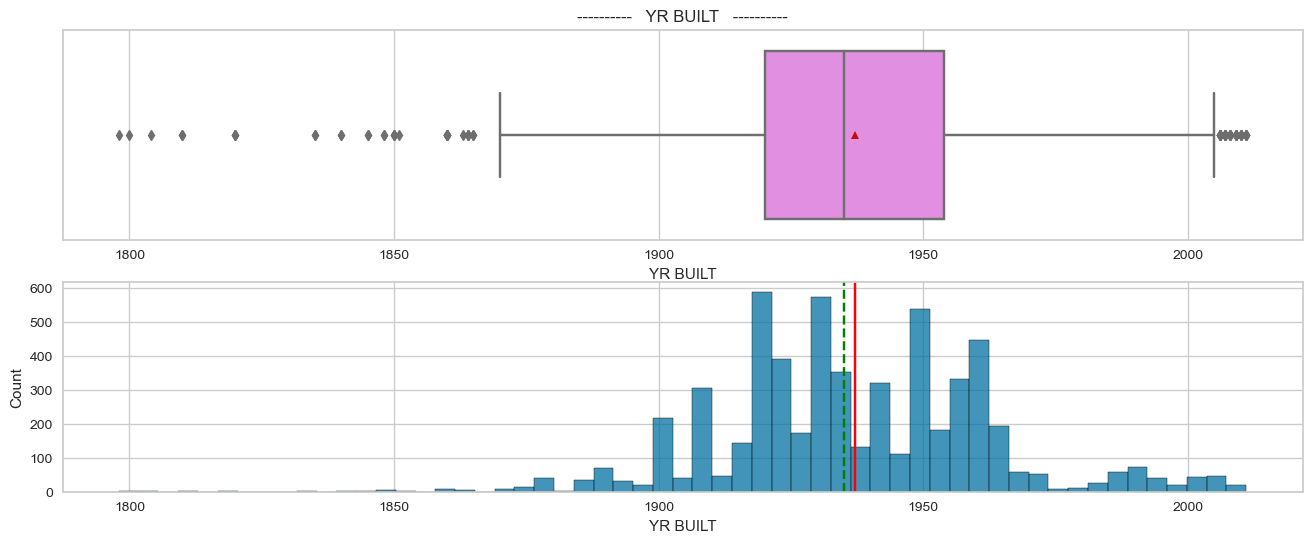

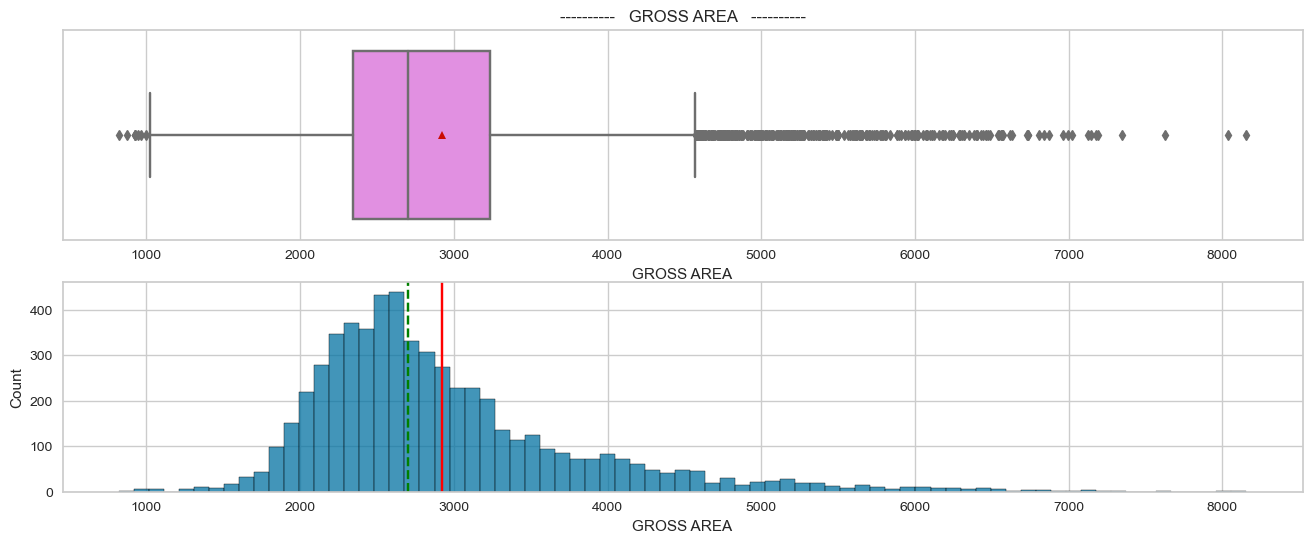

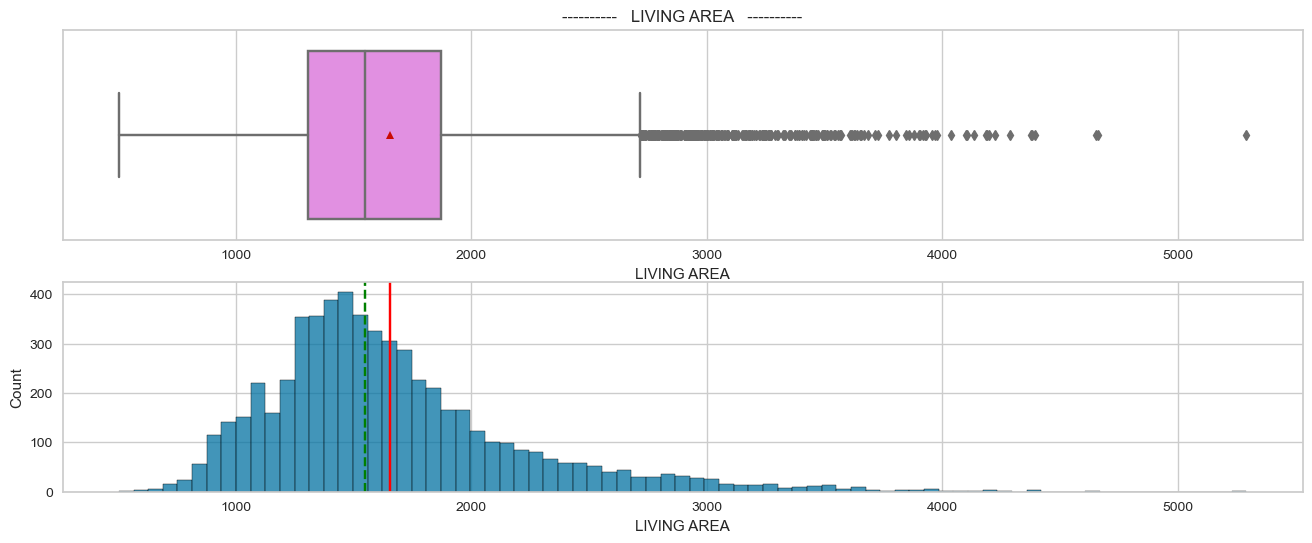

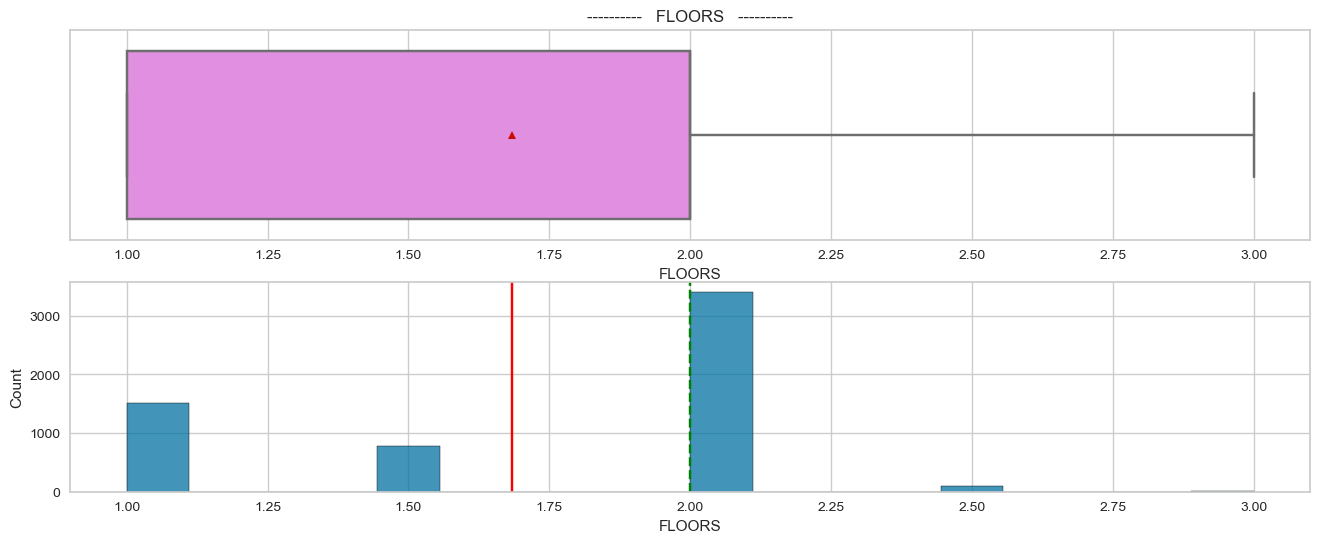

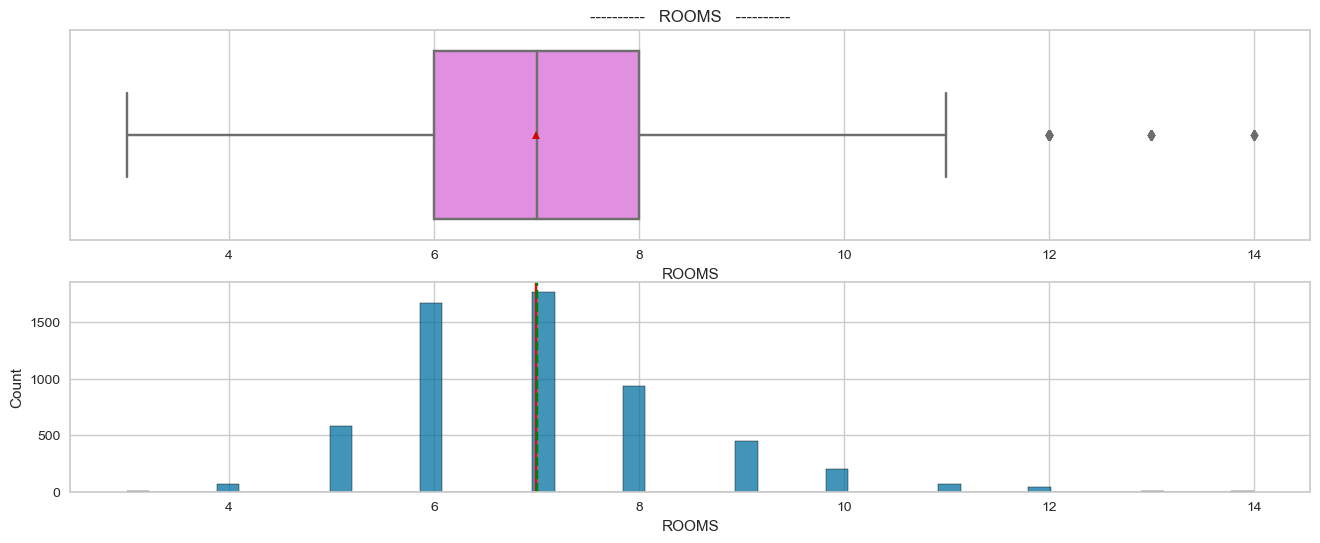

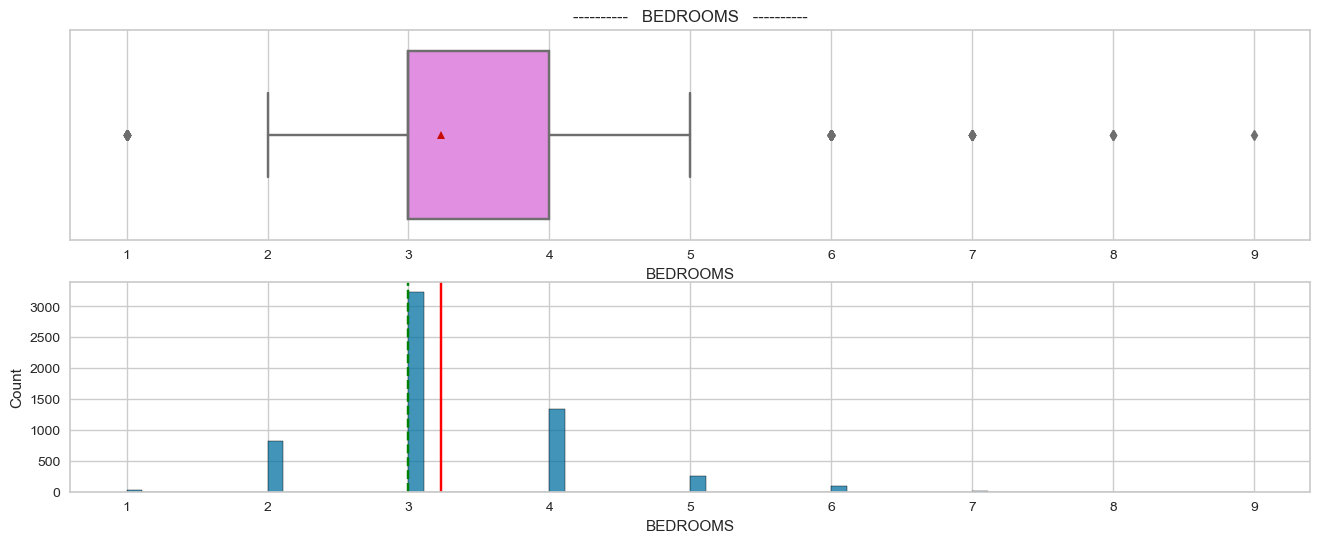

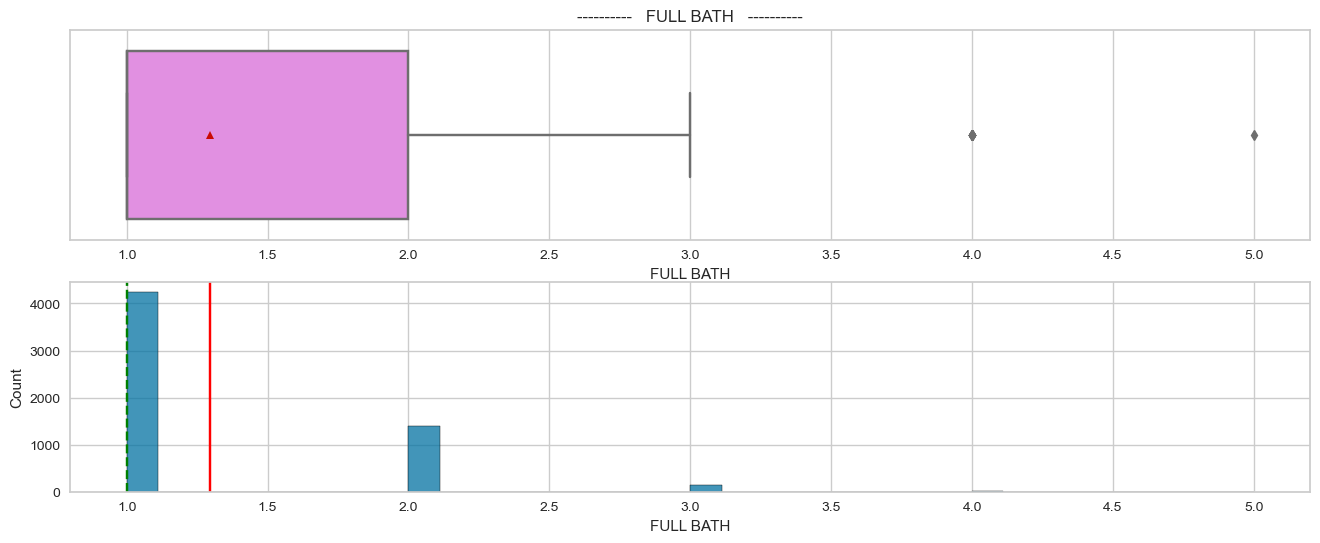

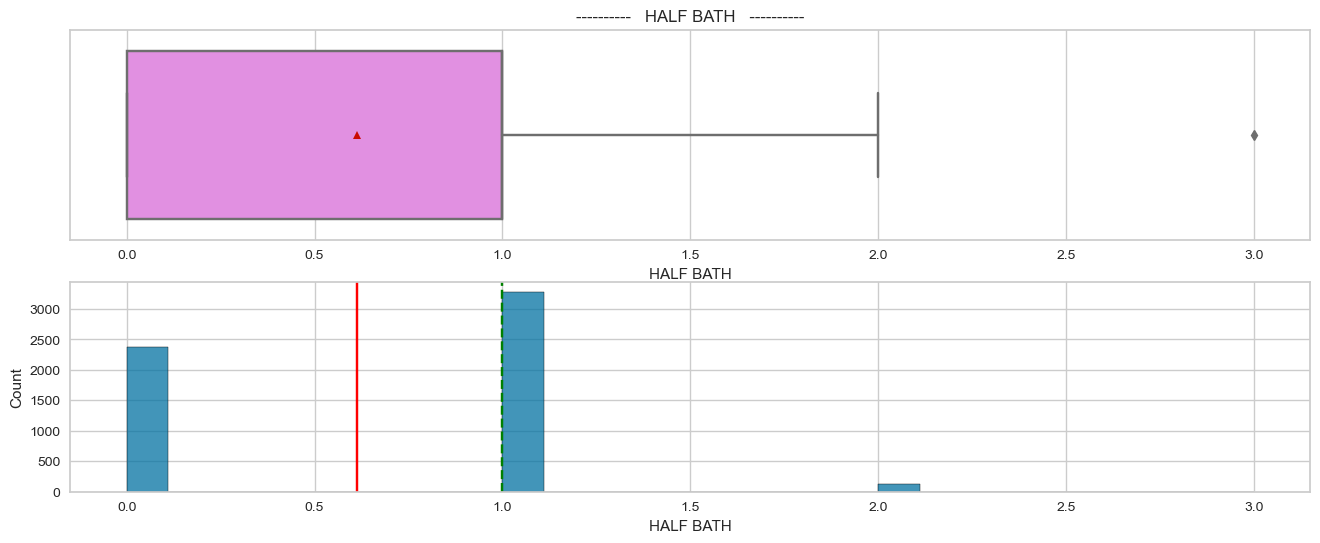

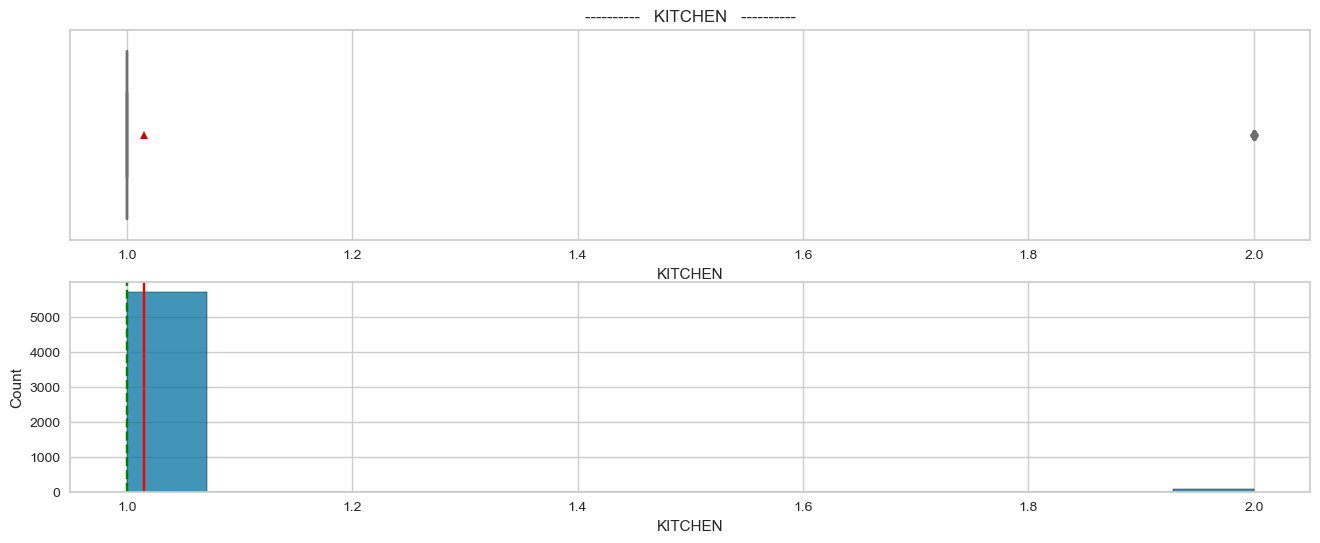

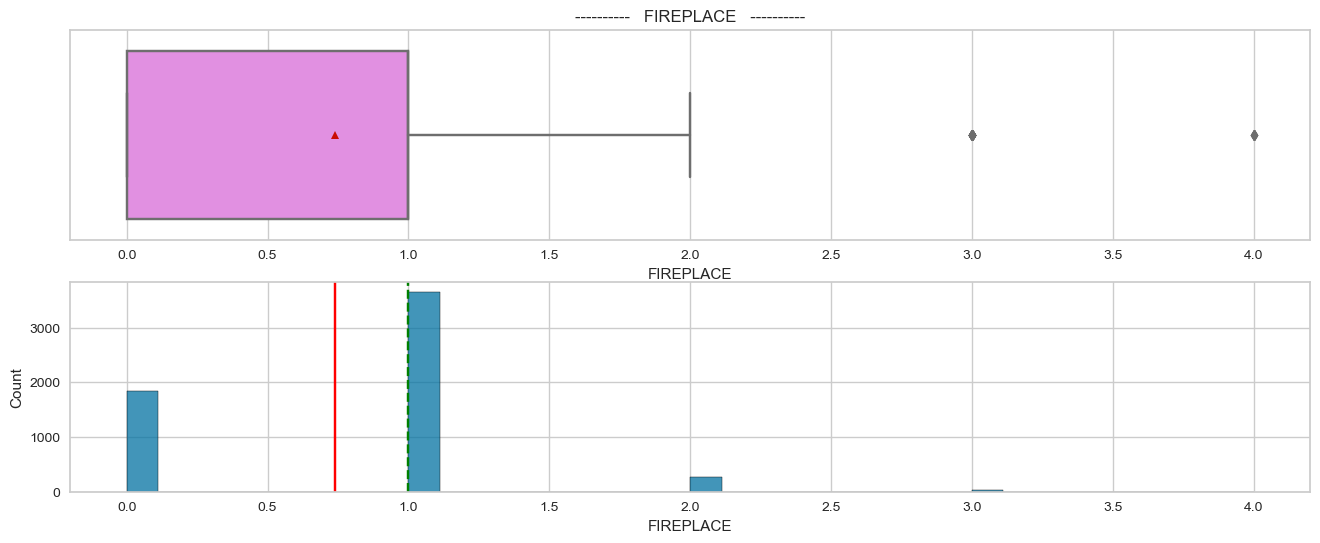

In [28]:
for col in numeric_columns:
    plt.figure(figsize=(16, 6))
    plt.subplot(2, 1, 1)
    plt.title("----------   " + col + "   ----------")
    sns.boxplot(data=datahouse, x=col, showmeans=True, color="violet")
    plt.subplot(2, 1, 2)
    sns.histplot(data=datahouse, x=col)
    plt.axvline(datahouse[col].mean(), color="red", linestyle="-")
    plt.axvline(datahouse[col].median(), color="green", linestyle="--")
    plt.show()

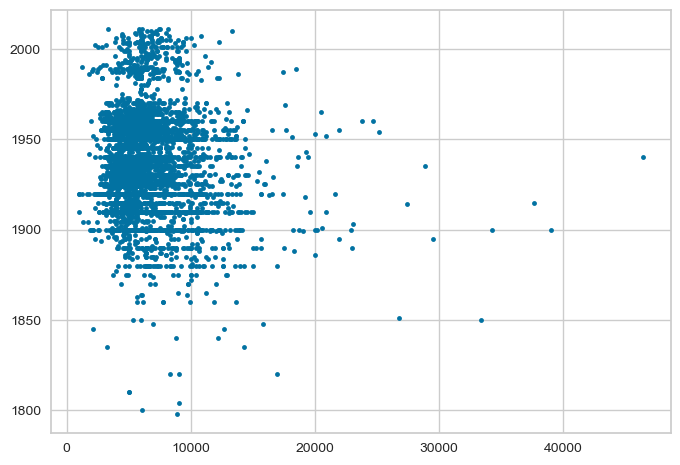

In [32]:
plt.plot(datahouse['LOT SQFT'], datahouse['YR BUILT'], '.')

In [33]:
datahouse.columns

Index(['TOTAL VALUE', 'LOT SQFT', 'YR BUILT', 'GROSS AREA', 'LIVING AREA',
       'FLOORS', 'ROOMS', 'BEDROOMS', 'FULL BATH', 'HALF BATH', 'KITCHEN',
       'FIREPLACE', 'REMODEL'],
      dtype='object')

### 7) Split the data into a training (70%) and a testing (30%) datasets. Use the training dataset to train a Linear Regression model to explain/predict the 'TOTAL VALUE' of houses using all the available features. Evaluate the performance of the model on both the training and the test dataset using R-squared.

In [44]:
X = datahouse.drop('TOTAL VALUE', axis=1)
y = datahouse['TOTAL VALUE'].astype(float)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=9)
X_train.shape[0], X_test.shape[0]

(4058, 1740)

In [45]:
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object"]).columns.tolist(),
    drop_first=True,
)
X.head()

,LOT SQFT,YR BUILT,GROSS AREA,LIVING AREA,FLOORS,ROOMS,BEDROOMS,FULL BATH,HALF BATH,KITCHEN,FIREPLACE,REMODEL
0,9965.0,1880.0,2436,1352,2.0,6,3,1,1,1,0,0
1,6590.0,1945.0,3108,1976,2.0,10,4,2,1,1,0,1
2,7500.0,1890.0,2294,1371,2.0,8,4,1,1,1,0,0
3,13773.0,1957.0,5032,2608,1.0,9,5,1,1,1,1,0
4,5000.0,1910.0,2370,1438,2.0,7,3,2,0,1,0,0


In [46]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame({"RMSE": rmse,"MAE": mae,"R-squared": r2,"Adj. R-squared": adjr2,"MAPE": mape,},index=[0])

    return df_perf

In [47]:
sk_lin_reg = LinearRegression()  # define the model
sk_lin_reg.fit(X_train, y_train)  # train the model

print(f"Coefficients: {sk_lin_reg.coef_}")
print(f"Intercept: {sk_lin_reg.intercept_}")
print("Training Performance\n")
sk_lin_reg_train_perf = model_performance_regression(sk_lin_reg, X_train, y_train)
sk_lin_reg_train_perf

Coefficients: [ 7.84532923e-03  1.28739923e-01  3.22348384e-02  5.19155379e-02
  4.26419618e+01  1.90878899e+00 -2.44306120e+00  2.19465970e+01
  1.82061833e+01 -1.74519895e+01  1.77652544e+01  5.95472734e+00]
Intercept: -200.76354058248086
Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,43.364267,32.803496,0.801147,0.800557,8.557529


In [48]:
print("Testing Performance\n")
sk_lin_reg_test_perf = model_performance_regression(sk_lin_reg, X_test, y_test)
sk_lin_reg_test_perf

Testing Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,43.836509,33.414116,0.819614,0.81836,8.746584


### 8) Interprete the R-squared value for your model.

In [ ]:
### The Training R-squared 0.80 means that 80% variance of dependent variables can be explained by independent variables.
### There is a good fit of model to the training data.

###The Testing R-squared 0.82 means that 82% variance of dependent variables can be explained by independent variables.
### There is a good ability of model to be not overfitting the unseen or new data.

### 9) Provide the interpretation of any three model coefficients.

In [50]:
import statsmodels.api as sms

# Define the predictor variables and target variable

# Fit a linear regression model
model = sms.OLS(y, sms.add_constant(X)).fit()

# Print the model summary
print(model.summary())

# Interpret 3 model coefficients
print('Interpretation of Model Coefficients:')
print('LOT SQFT: Holding all other variables constant, one-unit increase in lot square footage, the total value of the property increases by', round(model.params['LOT SQFT'], 4))
print('GROSS AREA: Holding all other variables constant, one-unit increase in gross area, the total value of the property increases by', round(model.params['GROSS AREA'], 4))
print('FULL BATH: Holding all other variables constant, one-unit increase in the number of full bathrooms is associated with an increase in the total value of the property by', round(model.params['FULL BATH'], 4))

                            OLS Regression Results                            
Dep. Variable:            TOTAL VALUE   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     2024.
Date:                Tue, 21 May 2024   Prob (F-statistic):               0.00
Time:                        06:25:43   Log-Likelihood:                -30095.
No. Observations:                5798   AIC:                         6.022e+04
Df Residuals:                    5785   BIC:                         6.030e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -177.9352     52.971     -3.359      

### 10) Use KMeans clustering as a feature engineering technique to create a new feature (information about clusters) that can be included in your Linear regression model. Only use the features 'LOT SQFT' and 'YR BUILT' for your KMeans clustering analysis. 

#### 10.1) Identify the appropriate number of clusters using the Silhouette score method.

In [55]:
datahouse.head()

,TOTAL VALUE,LOT SQFT,YR BUILT,GROSS AREA,LIVING AREA,FLOORS,ROOMS,BEDROOMS,FULL BATH,HALF BATH,KITCHEN,FIREPLACE,REMODEL
0,344.2,9965.0,1880.0,2436,1352,2.0,6,3,1,1,1,0,0
1,412.6,6590.0,1945.0,3108,1976,2.0,10,4,2,1,1,0,1
2,330.1,7500.0,1890.0,2294,1371,2.0,8,4,1,1,1,0,0
3,498.6,13773.0,1957.0,5032,2608,1.0,9,5,1,1,1,1,0
4,331.5,5000.0,1910.0,2370,1438,2.0,7,3,2,0,1,0,0


In [57]:
scaler = MinMaxScaler()
columns_to_scale = ['LOT SQFT', 'YR BUILT']
datahouse_scaled = pd.DataFrame(scaler.fit_transform(datahouse[columns_to_scale]), columns=columns_to_scale)

In [58]:
datahouse_scaled.head()

,LOT SQFT,YR BUILT
0,0.197472,0.384977
1,0.123156,0.690141
2,0.143194,0.431925
3,0.281323,0.746479
4,0.088145,0.525822


For n_clusters = 2, WCSS: = 51.37768062147171, Silhouette score: 0.4789110197273456)
For n_clusters = 3, WCSS: = 37.494616111235175, Silhouette score: 0.44886408194284527)
For n_clusters = 4, WCSS: = 28.045824868782702, Silhouette score: 0.4682304141932619)
For n_clusters = 5, WCSS: = 22.723581575736965, Silhouette score: 0.4753710233262341)
For n_clusters = 6, WCSS: = 19.468003133227818, Silhouette score: 0.4184830246680209)
For n_clusters = 7, WCSS: = 17.024162542809016, Silhouette score: 0.40684305199829884)
For n_clusters = 8, WCSS: = 14.734828913526856, Silhouette score: 0.4230699023588852)
For n_clusters = 9, WCSS: = 13.080153993009791, Silhouette score: 0.3982550566535147)
For n_clusters = 10, WCSS: = 11.955369359830454, Silhouette score: 0.3951235573354072)


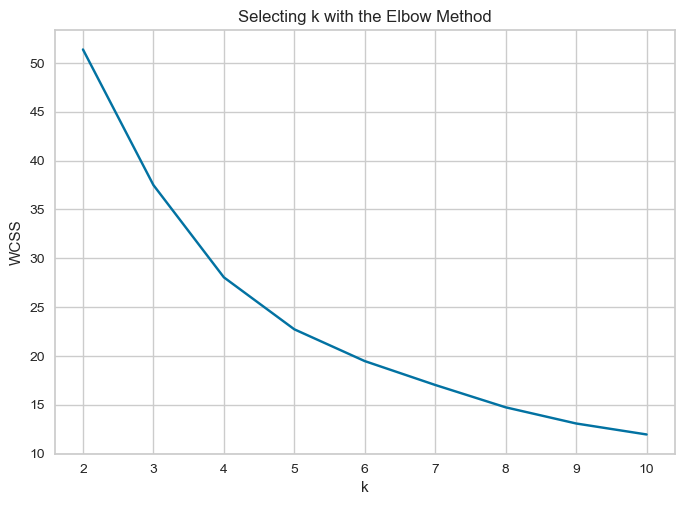

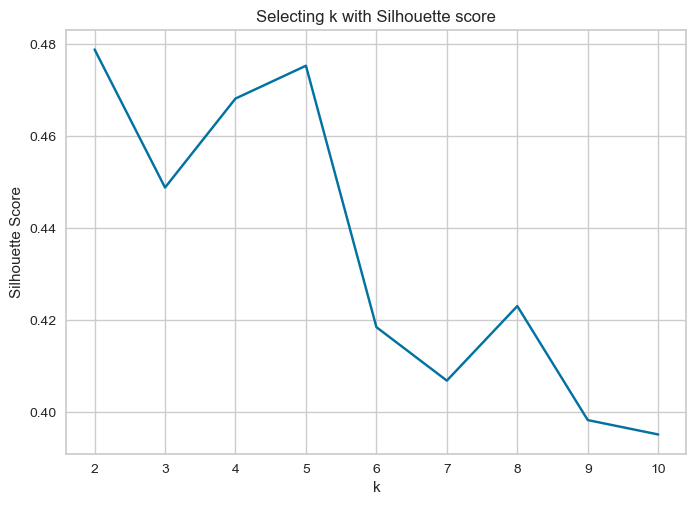

In [60]:
clusters = range(2, 11)
elbow = []
sil_score = []

# perform k-means clustering for different values of k
for k in clusters:
    model = KMeans(n_clusters=k, init='k-means++', algorithm='elkan', max_iter=100, random_state = 1).fit(datahouse_scaled)
    prediction = model.predict(datahouse_scaled)

    # within cluster sum of squared distances between each member of the cluster and its centroid
    wcss = model.inertia_
    elbow.append(wcss)
    
    # Silhouette score
    score = silhouette_score(datahouse_scaled, prediction)
    sil_score.append(score)
    print("For n_clusters = {}, WCSS: = {}, Silhouette score: {})".format(k, wcss, score))
    #print(model.n_iter_)

plt.plot(clusters, elbow, "bx-")
plt.xlabel("k")
plt.ylabel("WCSS")
plt.title("Selecting k with the Elbow Method")
plt.show()

plt.plot(clusters, sil_score)
plt.xlabel("k")
plt.ylabel("Silhouette Score")
plt.title("Selecting k with Silhouette score")
plt.show()

#### 10.2) Use the optimal # of clusters you identified above to perform KMeans clustering analysis using 'LOT SQFT' and 'YR BUILT' features on the entire dataset. Assign the clustering result as a new column in your original dataset. 

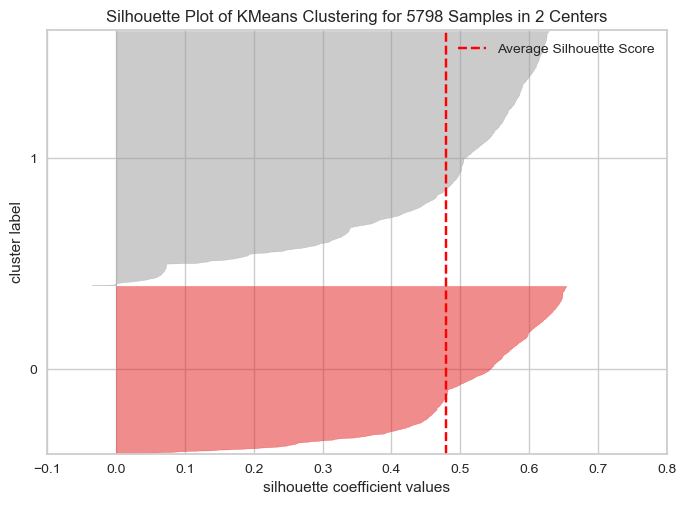

KMeans(algorithm='elkan', max_iter=100, n_clusters=2, random_state=1)

In [63]:
optimal_k = 2

kmeans = KMeans(n_clusters=optimal_k, init='k-means++', algorithm='elkan', max_iter=100, random_state = 1)

# visualizing the silhouette score
visualizer = SilhouetteVisualizer(kmeans)
visualizer.fit(datahouse_scaled)
visualizer.show()

kmeans.fit(datahouse_scaled)

In [64]:
kmeans.n_iter_

5

In [65]:
# adding kmeans cluster labels to the original and scaled dataframes
datahouse["K_means_segments"] = kmeans.labels_
datahouse_scaled["K_means_segments"] = kmeans.labels_

#### 10.3) Visualize the clusters.

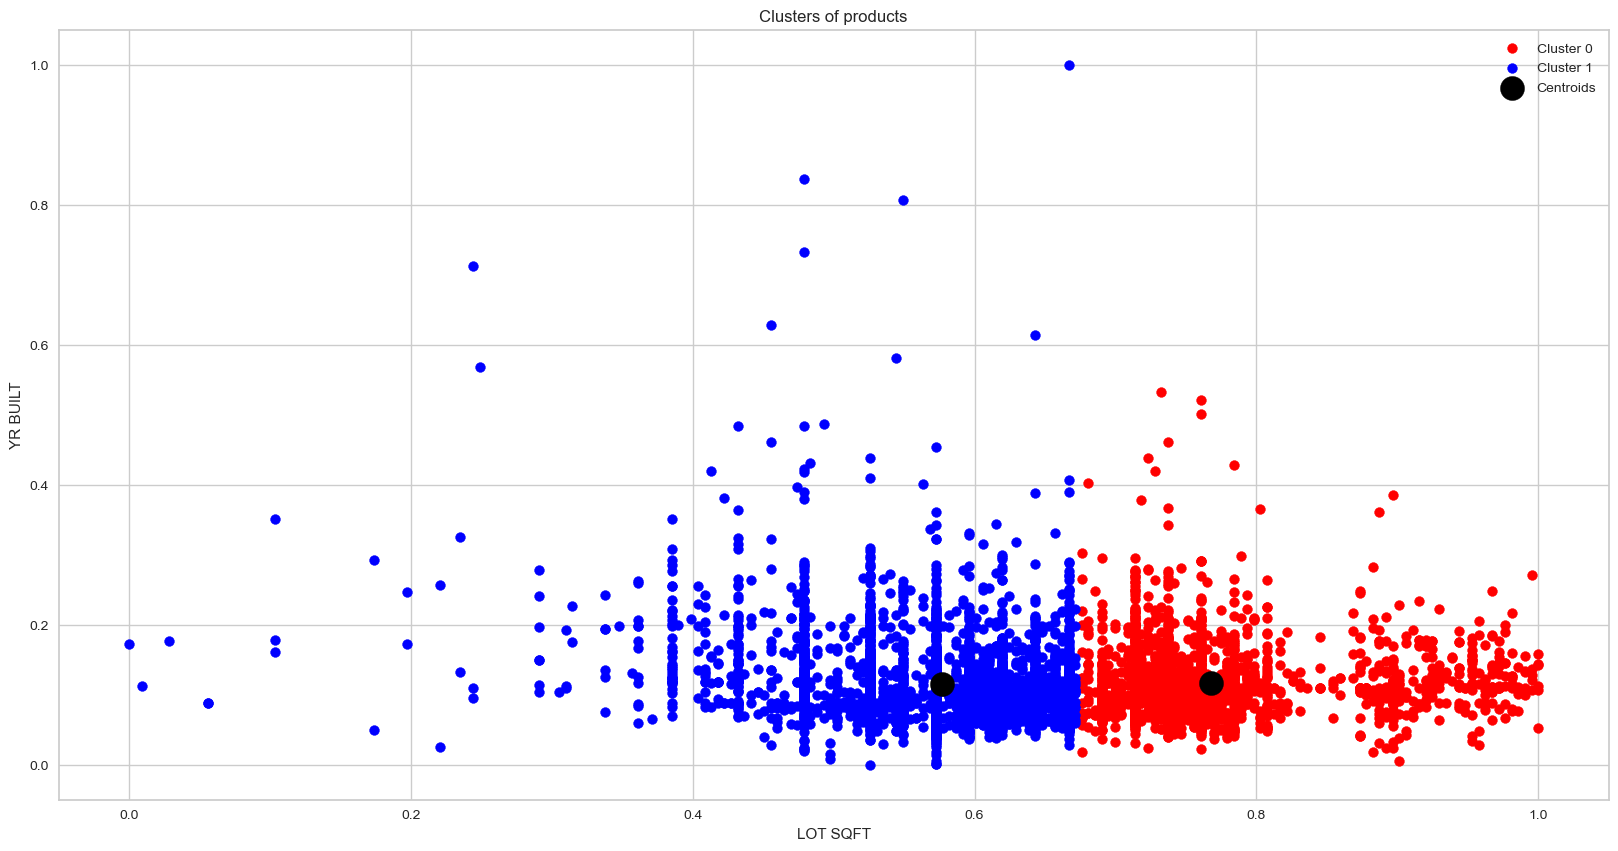

In [66]:
xx = 'LOT SQFT'
yy = 'YR BUILT'

colors = ['red','blue','green','yellow','magenta']
plt.figure(figsize=(20,10))
for p in range(optimal_k):
    plt.scatter(datahouse_scaled[datahouse_scaled['K_means_segments']==p][yy], datahouse_scaled[datahouse_scaled['K_means_segments']==p][xx], s = 50, c = colors[p], label = 'Cluster '+str(p))
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 0], s = 300, c = 'black', label = 'Centroids')
plt.title('Clusters of products')
plt.xlabel(xx)
plt.ylabel(yy)
plt.legend()
plt.show()

#### 10.4) Re-train/evaluate your Linear regression model using the new dataset that includes an additional feature (cluster assignments). 

In [68]:
X_w_clusters = datahouse.drop(["TOTAL VALUE"], axis=1)
y = datahouse["TOTAL VALUE"]

X_w_clusters = pd.get_dummies(
    X_w_clusters,
    columns=['REMODEL'],
    drop_first=True,
)
display(X_w_clusters.head())

X_w_clusters_train, X_w_clusters_test, y_train, y_test = train_test_split(X_w_clusters, y, test_size=0.3, random_state=1)
print("Number of rows in train data =", X_w_clusters_train.shape[0])
print("Number of rows in test data =", X_w_clusters_test.shape[0])

sk_lin_reg_w_clusters = LinearRegression()  # define the model
sk_lin_reg_w_clusters.fit(X_w_clusters_train, y_train)  # train the model

print(f"Coefficients: {sk_lin_reg_w_clusters.coef_}")
print(f"Intercept: {sk_lin_reg_w_clusters.intercept_}\n")

print("Training Performance\n")
sk_lin_reg_w_clusters_train_perf = model_performance_regression(sk_lin_reg_w_clusters, X_w_clusters_train, y_train)
display(sk_lin_reg_w_clusters_train_perf)

print("Testing Performance\n")
sk_lin_reg_w_clusters_test_perf = model_performance_regression(sk_lin_reg_w_clusters, X_w_clusters_test, y_test)
display(sk_lin_reg_w_clusters_test_perf)

,LOT SQFT,YR BUILT,GROSS AREA,LIVING AREA,FLOORS,ROOMS,BEDROOMS,FULL BATH,HALF BATH,KITCHEN,FIREPLACE,K_means_segments,REMODEL_1,REMODEL_2
0,9965.0,1880.0,2436,1352,2.0,6,3,1,1,1,0,1,0,0
1,6590.0,1945.0,3108,1976,2.0,10,4,2,1,1,0,0,1,0
2,7500.0,1890.0,2294,1371,2.0,8,4,1,1,1,0,1,0,0
3,13773.0,1957.0,5032,2608,1.0,9,5,1,1,1,1,0,0,0
4,5000.0,1910.0,2370,1438,2.0,7,3,2,0,1,0,1,0,0


Number of rows in train data = 4058
Number of rows in test data = 1740
Coefficients: [ 9.36585314e-03  5.12375333e-01  3.09774981e-02  5.42179461e-02
  3.50545219e+01  1.10763848e-01 -2.63145578e-01  1.86051921e+01
  1.99558832e+01 -9.91589946e+00  1.87714772e+01  2.79715739e+01
  2.50487886e+01  7.15960361e+00]
Intercept: -959.2920432463397

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,42.277034,32.019532,0.820222,0.819599,8.346084


Testing Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,42.041436,30.995881,0.814353,0.812847,8.101366


#### 10.5) Is this model better than your previous model?

The new model with clustering information is marginally better than the old model, but doesn't have any significance predictive advantage compared to the previous (simpler) model